###Part 4 Do Unsupervised learning from audio metadata


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


df = pd.read_pickle('BeatlesSongsNLPwithGPT.pkl')

# Drop 'Revolution 9' song from the DataFrame. it is an extreme outlier that messes up the clustering
# Leaving out Real Love and Free as a Bird here because they are also outliers
df = df[df['song'] != 'Revolution 9']
df = df[df['song'] != 'Real Love']
df = df[df['song'] != 'Free as a Bird']







In [74]:
import os
os.getcwd()


'c:\\Users\\rob\\Documents\\Github\\Spotify'

In [75]:
df.shape

(196, 61)

In [76]:
df.dtypes

Id                                   int64
SongKey                             object
song                                object
songwriters                         object
lead_vocals                         object
year                                object
cover                                int64
Era                                 object
first_release_date          datetime64[ns]
max_key                            float64
mode                               float64
avg_danceability                   float64
avg_energy                         float64
avg_loudness                       float64
avg_speechiness                    float64
avg_acousticness                   float64
avg_instrumentalness               float64
avg_liveness                       float64
avg_valence                        float64
avg_tempo                          float64
avg_duration_ms                    float64
avg_time_signature                 float64
Song_y                              object
lyrics     

In [77]:
##fix some data type issues so I can apply K-Means clustering algo

df['year'] = df['year'].astype('int')
df = pd.get_dummies(df, columns=['FinetunedSentiment'])




In [78]:
df['year'].value_counts()

1968    32
1963    30
1964    30
1965    28
1969    26
1967    23
1966    16
1970    10
1962     1
Name: year, dtype: int64

In [79]:

df['FinetunedSentiment_Positive'].value_counts()

1    145
0     51
Name: FinetunedSentiment_Positive, dtype: int64

In [80]:
df.dtypes

Id                                      int64
SongKey                                object
song                                   object
songwriters                            object
lead_vocals                            object
year                                    int32
cover                                   int64
Era                                    object
first_release_date             datetime64[ns]
max_key                               float64
mode                                  float64
avg_danceability                      float64
avg_energy                            float64
avg_loudness                          float64
avg_speechiness                       float64
avg_acousticness                      float64
avg_instrumentalness                  float64
avg_liveness                          float64
avg_valence                           float64
avg_tempo                             float64
avg_duration_ms                       float64
avg_time_signature                

In [81]:

## add in the one-hot encoded columns



# Select columns by label in a range
##columns_to_include = ['John_Song', 'Paul_Song', 'George_Song', 'Ringo_Song', 'year', 'cover']
##df_subset = df.loc[:, 'mode':'avg_time_signature'] #these are the metadata columns from the Spotify API
##df_subset = pd.concat([df_subset, df[columns_to_include]], axis=1)




columns_to_include = ['year', 'avg_danceability', 'avg_energy', 'avg_loudness', 'avg_speechiness', 'avg_acousticness', 'avg_instrumentalness', 'avg_liveness', 
                      'avg_valence', 'avg_tempo', 'avg_duration_ms',  'avg_popularity', 
                      'BB_weeks_on_chart',  'cover', 'vader_compound'
                      # 'Paul_Song', 'John_Song', 'George_Song', 'Ringo_Song', 
                      #'BB_peak_position',	'RollingStonePosition', 'avg_time_signature','FinetunedSentiment_Positive',
                      ]

df_subset = df[columns_to_include]



In [82]:
##fix some of the missing values
#df_subset['RollingStonePosition'] = df_subset['RollingStonePosition'].fillna(0)
#df_subset['BB_peak_position'] = df_subset['BB_peak_position'].fillna(0)


#df_subset.loc[:, 'RollingStonePosition'] = df_subset['RollingStonePosition'].fillna(0).copy()
df_subset.loc[:, 'BB_weeks_on_chart'] = df_subset['BB_weeks_on_chart'].fillna(0).copy()
#df_subset.loc[:, 'BB_peak_position'] = df_subset['BB_peak_position'].fillna(0).copy()



C:\Users\rob\AppData\Local\Temp\ipykernel_9716\2866810716.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset.loc[:, 'BB_weeks_on_chart'] = df_subset['BB_weeks_on_chart'].fillna(0).copy()
C:\Users\rob\AppData\Local\Temp\ipykernel_9716\2866810716.py:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_subset.loc[:, 'BB_weeks_on_chart'] = df_subset['BB_weeks_on_chart'].fillna(0).copy()


In [83]:

missing = df_subset.isnull().sum()
print("Missing values:\n", missing)


Missing values:
 year                    0
avg_danceability        0
avg_energy              0
avg_loudness            0
avg_speechiness         0
avg_acousticness        0
avg_instrumentalness    0
avg_liveness            0
avg_valence             0
avg_tempo               0
avg_duration_ms         0
avg_popularity          0
BB_weeks_on_chart       0
cover                   0
vader_compound          0
dtype: int64


In [84]:
df_subset

,year,avg_danceability,avg_energy,avg_loudness,avg_speechiness,avg_acousticness,avg_instrumentalness,avg_liveness,avg_valence,avg_tempo,avg_duration_ms,avg_popularity,BB_weeks_on_chart,cover,vader_compound
0,1969,0.347600,0.409,-10.6498,0.028000,0.518200,0.000022,0.239420,0.789400,140.437800,223713.600000,41.875000,0,0,0.9313
1,1965,0.702000,0.447,-10.1220,0.030800,0.366000,0.000000,0.153000,0.944000,93.020000,150373.000000,51.000000,7,1,0.9443
2,1963,0.490000,0.579,-10.3010,0.034400,0.217000,0.000000,0.064400,0.879000,119.403000,122573.000000,54.000000,0,0,0.9747
3,1963,0.365333,0.572,-9.2150,0.032033,0.114767,0.001540,0.519333,0.835667,107.967667,129937.666667,42.600000,6,0,0.9839
4,1969,0.596500,0.422,-8.6985,0.065400,0.094100,0.000000,0.456500,0.833500,96.091000,130760.000000,46.000000,0,0,0.9663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,1963,0.511000,0.341,-10.7995,0.032950,0.623000,0.000000,0.169300,0.712500,80.269000,169787.000000,37.333333,0,1,0.9794
192,1965,0.488000,0.539,-8.7520,0.030400,0.136000,0.000000,0.053800,0.473000,115.941000,199960.000000,56.000000,0,0,-0.7804
193,1967,0.698000,0.293,-11.3610,0.033200,0.784000,0.010600,0.093600,0.724000,117.613000,148413.000000,36.000000,0,0,0.0000
194,1965,0.533000,0.660,-7.6940,0.033700,0.346000,0.000000,0.260000,0.818000,131.975000,138667.000000,56.000000,0,0,0.3527


In [85]:
##scale the data and use mean substituion for missing values

# Select columns to include
columns_to_scale = ['year', 'avg_danceability', 'avg_energy', 'avg_loudness', 'avg_speechiness', 'avg_acousticness', 'avg_instrumentalness', 'avg_liveness', 
                      'avg_valence', 'avg_tempo', 'avg_duration_ms',  'avg_popularity', 
                      'BB_weeks_on_chart',  'cover', 'vader_compound']

# Select subset of columns and fill missing values with means
df_subset = df_subset[columns_to_scale].copy()
df_subset = df_subset.fillna(df_subset.mean())

# Apply StandardScaler to normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_subset)
df_scaled = pd.DataFrame(df_scaled, columns=df_subset.columns)


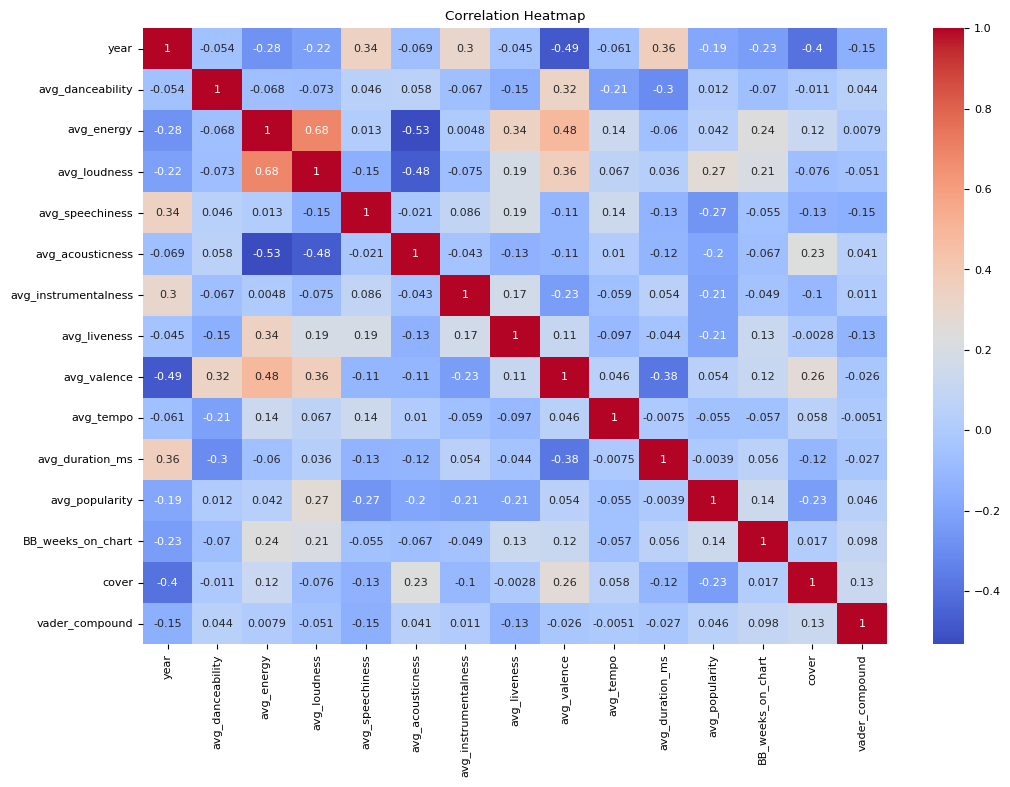

In [86]:

# Calculate correlation on the subset dataframe
correlation = df_subset.corr()

# Change the global font size
mpl.rcParams['font.size'] = 8.0

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Reset the global font size to its default value
mpl.rcParams['font.size'] = mpl.rcParamsDefault['font.size']


loudness is highly correlated with energy
valence is also correlated with energy
positive sentiment from the lyrics NLP model built on song lyrics shows almost no correlation with valence from Spotify!
John song and paul song are highly inversely correlated. shouldn't this be -1? because I've forced mutual exclusivity
Billboard and Rolling Stone ratings shouldn't use 0 substitution because in both cases a lower number is better. -- omit these or use mean substitution?
    - substitute weeks on charts as zero has a real value here and more is better
    - drop Rolling Stone as input variable?

In [87]:
df_subset.tail(10)


,year,avg_danceability,avg_energy,avg_loudness,avg_speechiness,avg_acousticness,avg_instrumentalness,avg_liveness,avg_valence,avg_tempo,avg_duration_ms,avg_popularity,BB_weeks_on_chart,cover,vader_compound
186,1968,0.402500,0.541250,-10.035250,0.051950,0.094427,1.908540e-01,0.263700,0.534750,128.095500,232596.75,36.000000,0,0,-0.9856
187,1965,0.366500,0.184000,-11.509500,0.030650,0.875000,0.000000e+00,0.092700,0.336000,95.519000,125493.50,50.600000,11,0,0.4019
188,1964,0.570667,0.647333,-9.544333,0.035900,0.123867,5.266667e-07,0.515333,0.765333,131.217667,153649.00,36.000000,4,0,0.6804
189,1965,0.555000,0.570000,-7.869000,0.030200,0.415000,0.000000e+00,0.191000,0.899000,88.316000,156867.00,50.000000,0,0,0.9898
190,1969,0.346667,0.437667,-11.999667,0.044433,0.427667,7.262667e-02,0.132000,0.308667,172.858000,267840.00,46.000000,0,0,0.9878
191,1963,0.511000,0.341000,-10.799500,0.032950,0.623000,0.000000e+00,0.169300,0.712500,80.269000,169787.00,37.333333,0,1,0.9794
192,1965,0.488000,0.539000,-8.752000,0.030400,0.136000,0.000000e+00,0.053800,0.473000,115.941000,199960.00,56.000000,0,0,-0.7804
193,1967,0.698000,0.293000,-11.361000,0.033200,0.784000,1.060000e-02,0.093600,0.724000,117.613000,148413.00,36.000000,0,0,0.0000
194,1965,0.533000,0.660000,-7.694000,0.033700,0.346000,0.000000e+00,0.260000,0.818000,131.975000,138667.00,56.000000,0,0,0.3527
195,1965,0.398000,0.392000,-9.050000,0.028200,0.207000,0.000000e+00,0.102000,0.378000,184.267000,129120.00,49.000000,0,0,0.9717


In [88]:
#print the row in df_scaled that has a NaN value

df_scaled.tail(10)


,year,avg_danceability,avg_energy,avg_loudness,avg_speechiness,avg_acousticness,avg_instrumentalness,avg_liveness,avg_valence,avg_tempo,avg_duration_ms,avg_popularity,BB_weeks_on_chart,cover,vader_compound
186,0.843542,-1.056768,-0.044942,-0.011736,0.044900,-1.075190,1.048699,0.215606,-0.564658,0.277487,1.290535,-0.887175,-0.536548,-0.337100,-1.951352
187,-0.500638,-1.345073,-2.071824,-0.687312,-0.649406,2.025143,-0.447916,-1.003629,-1.511521,-1.202372,-0.697734,1.179791,1.772429,-0.337100,-0.065059
188,-0.948698,0.289989,0.556928,0.213227,-0.478274,-0.958258,-0.447912,2.009758,0.533862,0.419319,-0.175054,-0.887175,0.303080,-0.337100,0.313559
189,-0.500638,0.164523,0.118173,0.980950,-0.664074,0.198084,-0.447916,-0.302747,1.170661,-1.529584,-0.115315,1.094847,-0.536548,-0.337100,0.734185
190,1.291601,-1.503908,-0.632629,-0.911931,-0.200117,0.248395,0.121599,-0.723419,-1.641739,2.310922,1.944792,0.528555,-0.536548,-0.337100,0.731466
191,-1.396758,-0.187850,-1.181074,-0.361954,-0.574434,1.024233,-0.447916,-0.457469,0.282159,-1.895136,0.124532,-0.698411,-0.536548,2.966479,0.720046
192,-0.500638,-0.372045,-0.057708,0.576314,-0.657555,-0.910066,-0.447916,-1.280987,-0.858840,-0.274657,0.684665,1.944285,-0.536548,-0.337100,-1.672385
193,0.395482,1.309733,-1.453405,-0.619262,-0.566284,1.663703,-0.364794,-0.997212,0.336946,-0.198703,-0.272256,-0.887175,-0.536548,-0.337100,-0.611438
194,-0.500638,-0.011664,0.628794,1.061143,-0.549986,-0.075974,-0.447916,0.189224,0.784770,0.453722,-0.453181,1.944285,-0.536548,-0.337100,-0.131946
195,-0.500638,-1.092806,-0.891722,0.439755,-0.729267,-0.628064,-0.447916,-0.937320,-1.311429,2.829201,-0.630412,0.953274,-0.536548,-0.337100,0.709578


In [89]:
df_scaled.shape

(196, 15)

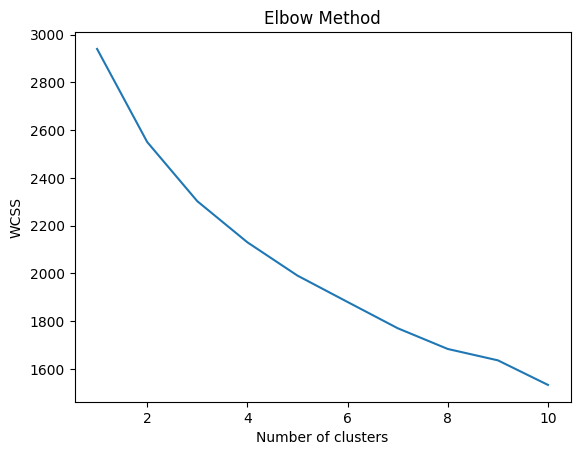

In [90]:


# Use the elbow method to find a good number of clusters with WCSS (within-cluster sum of square)
wcss = []
max_clusters = 10 # change this value based on your requirements
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, max_clusters + 1), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



In [98]:
# From the plot, it looks like 6 clusters is a good number. It's interesting because there's no clear 'elbow' as I would expect to see. 
# But 7 clusters seems to be a good number based on the plot. 

n_clusters = 7 # replace with your chosen number of clusters

# Apply KMeans with the chosen number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(df_scaled)

# Append the cluster labels to the original dataframe
df['cluster'] = kmeans.labels_



c:\Users\rob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [92]:
kmeans

KMeans(n_clusters=7, random_state=0)

In [99]:
df.columns

Index(['Id', 'SongKey', 'song', 'songwriters', 'lead_vocals', 'year', 'cover',
       'Era', 'first_release_date', 'max_key', 'mode', 'avg_danceability',
       'avg_energy', 'avg_loudness', 'avg_speechiness', 'avg_acousticness',
       'avg_instrumentalness', 'avg_liveness', 'avg_valence', 'avg_tempo',
       'avg_duration_ms', 'avg_time_signature', 'Song_y', 'lyrics',
       'avg_popularity', 'core_catalogue_releases', 'Canonical_album',
       'first_vocalist', 'Paul_Song', 'John_Song', 'George_Song', 'Ringo_Song',
       'popularity', 'BB_name', 'BB_artist', 'BB_debut_date',
       'BB_peak_position', 'BB_peak_date', 'BB_weeks_on_chart',
       'RollingStonePosition', 'RobSegment', 'LauraSegment', 'EmilySegment',
       'OliviaSegment', 'BrianSegment', 'JackieSegment', 'vader_neg',
       'vader_neu', 'vader_pos', 'vader_compound', 'roberta_neg',
       'roberta_neu', 'roberta_pos', 'Pipeline_sentiment_label',
       'Pipeline_sentiment_score', 'distilbertsentiment', 'text-davinci-

In [100]:
cluster_counts = df['cluster'].value_counts()
print(cluster_counts)

3    42
5    39
0    31
1    30
6    24
2    19
4    11
Name: cluster, dtype: int64


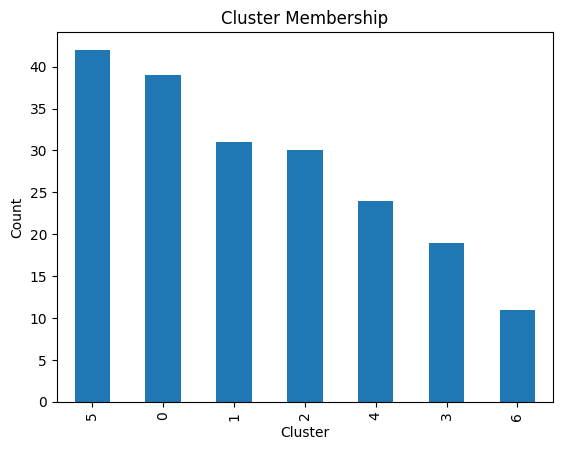

In [95]:

cluster_counts.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Cluster Membership')
plt.show()

In [101]:
cluster_profile = df.groupby('cluster').agg({
    'avg_danceability': 'mean',
    'avg_energy': 'mean',
    'avg_loudness': 'mean',
    'avg_speechiness': 'mean',
    'avg_acousticness': 'mean',
    'avg_instrumentalness': 'mean',
    'avg_liveness': 'mean',
    'avg_valence': 'mean',
    'avg_tempo': 'mean',
    'avg_duration_ms': 'mean',
    'avg_time_signature': 'mean',
    'avg_popularity': 'mean',
    'John_Song': 'sum',
    'Paul_Song': 'sum',
    'George_Song': 'sum',
    'Ringo_Song': 'sum',
    'RobSegment': 'mean',
    'LauraSegment': 'mean',
    'EmilySegment': 'mean',
    'OliviaSegment': 'mean',
    'BrianSegment': 'mean'
    })

# Print the cluster profile
print(cluster_profile)

         avg_danceability  avg_energy  avg_loudness  avg_speechiness  \
cluster                                                                
0                0.578903    0.563065     -9.404500         0.038641   
1                0.496902    0.303760    -12.572749         0.044914   
2                0.533996    0.603285    -10.583842         0.038598   
3                0.638844    0.569369     -9.535823         0.051190   
4                0.542497    0.560724    -11.185393         0.150464   
5                0.488567    0.685358     -8.495538         0.043276   
6                0.412560    0.533208     -9.883521         0.047530   

         avg_acousticness  avg_instrumentalness  avg_liveness  avg_valence  \
cluster                                                                      
0                0.296403              0.001044      0.137524     0.742484   
1                0.681388              0.104722      0.177189     0.447097   
2                0.542897              

In [102]:
# Group the DataFrame by 'cluster' column
cluster_groups = df.groupby('cluster')

# Iterate over each cluster group
for cluster, group in cluster_groups:
    print(f"Cluster {cluster} Songs:")
    print(group['song'])
    print()

Cluster 0 Songs:
2                        All I've Got to Do
9                              Another Girl
30                              Day Tripper
37                          Don't Bother Me
40                             Drive My Car
44                       Every Little Thing
49                               For No One
54                                     Girl
71                            Hold Me Tight
78                               I Need You
80               I Should Have Known Better
86                                If I Fell
87                      If I Needed Someone
90                      I'll Follow the Sun
97                    I've Just Seen a Face
98                               In My Life
100                        It Won't Be Long
102                          It's Only Love
120                                Michelle
125                        The Night Before
127    Norwegian Wood (This Bird Has Flown)
146                       Run for Your Life
162            

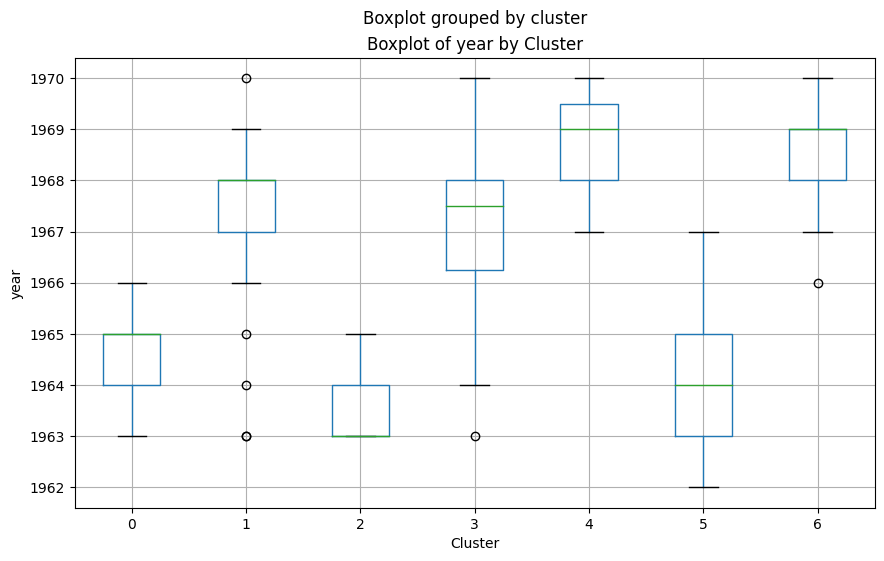

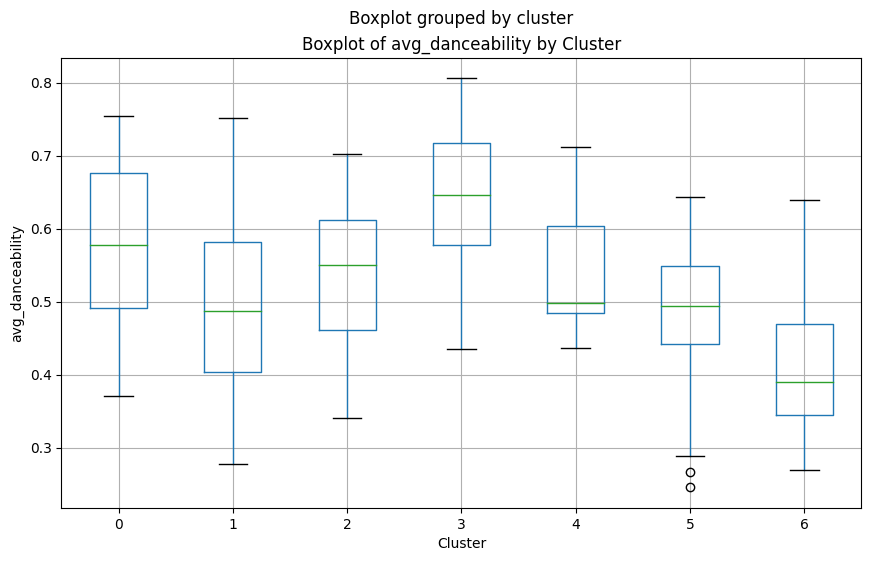

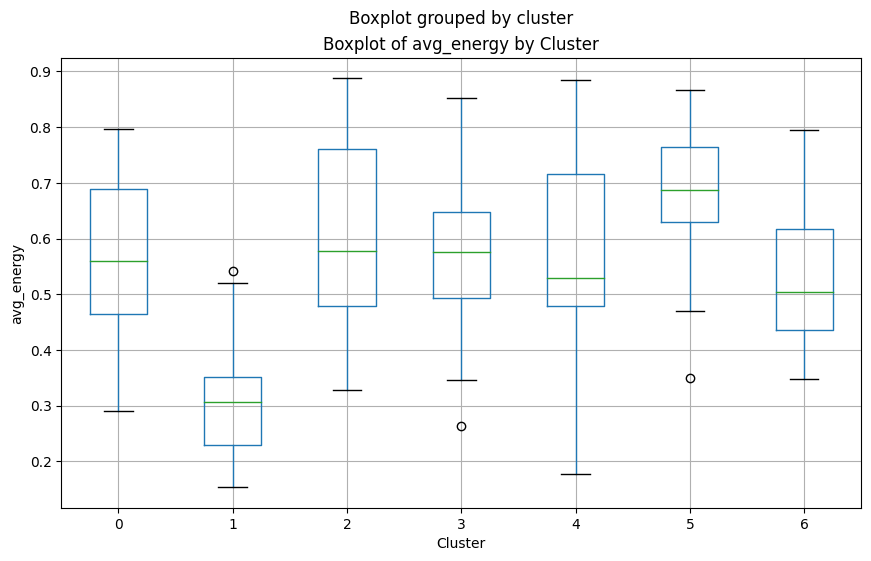

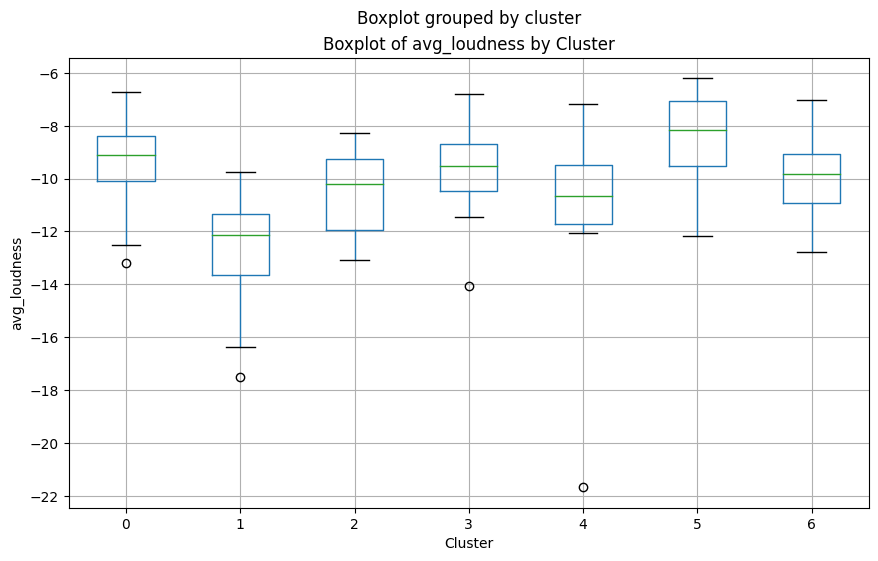

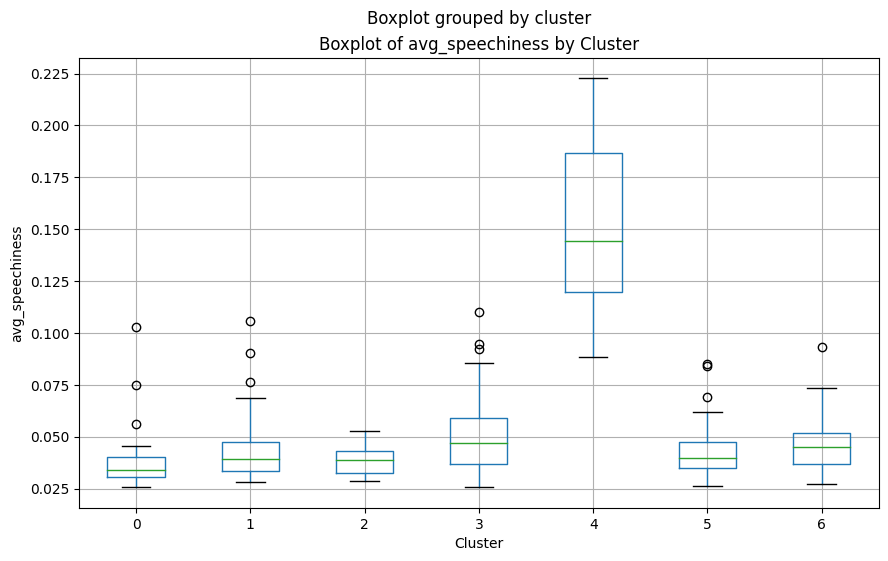

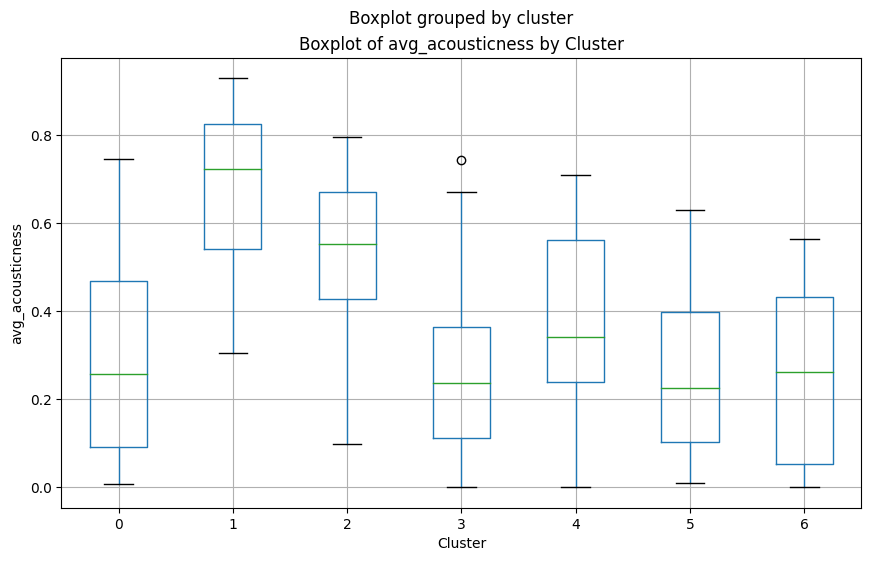

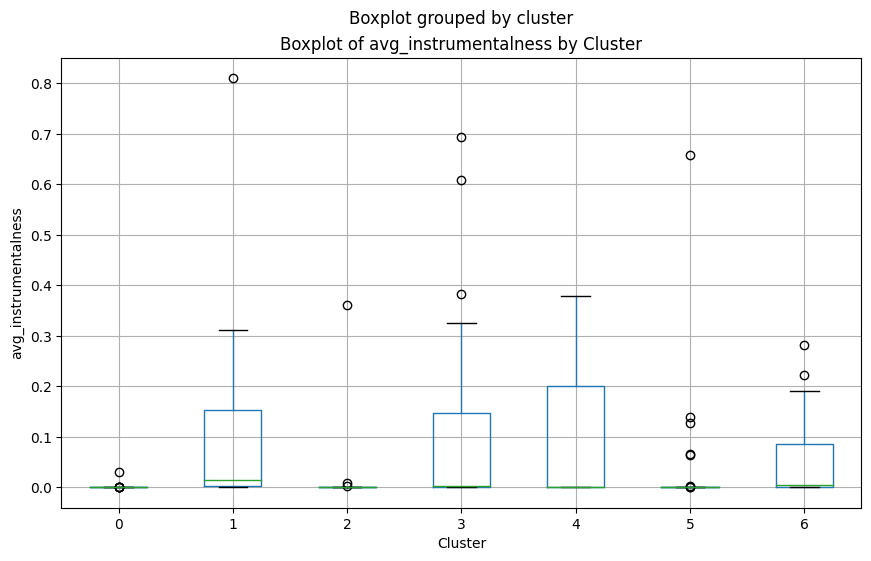

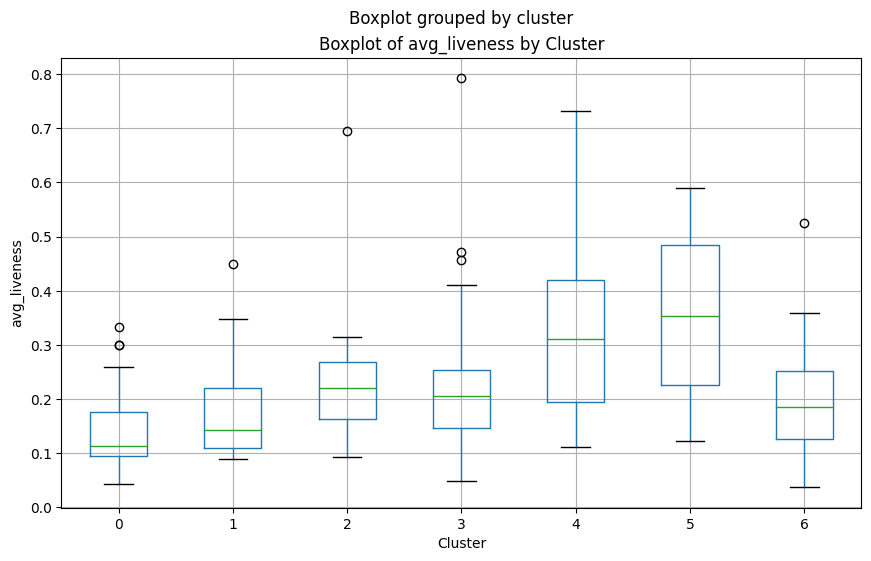

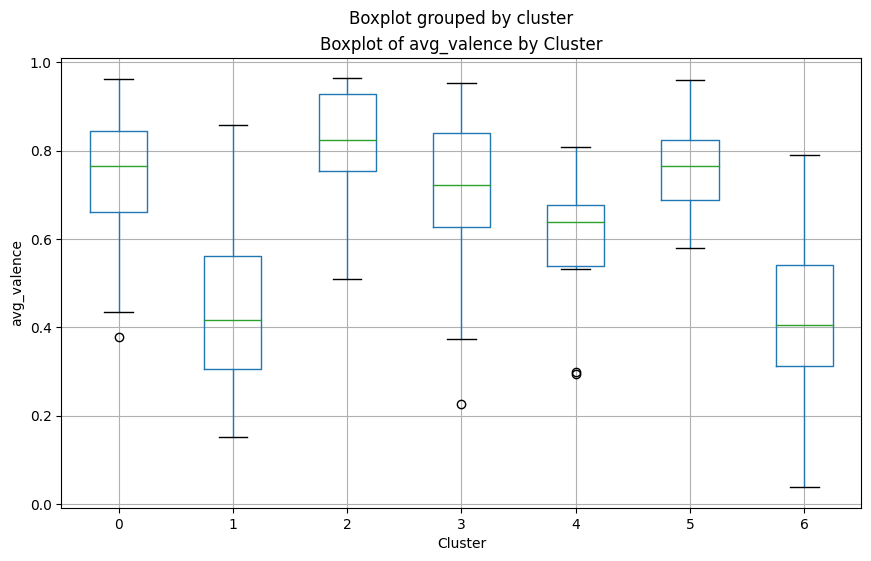

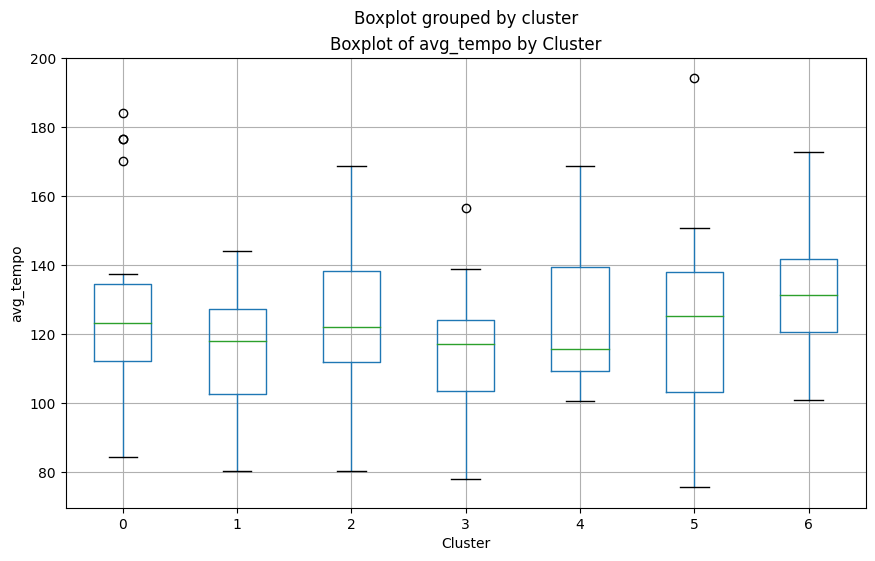

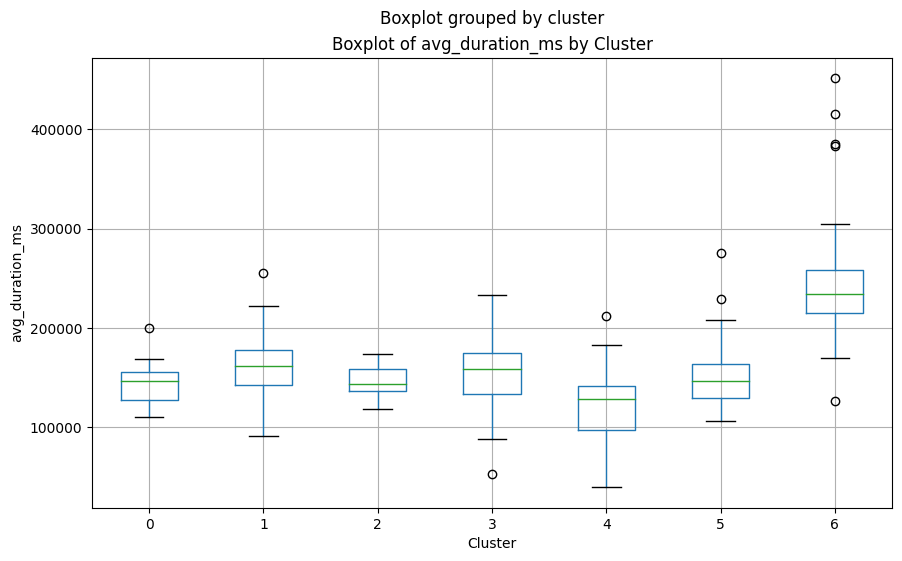

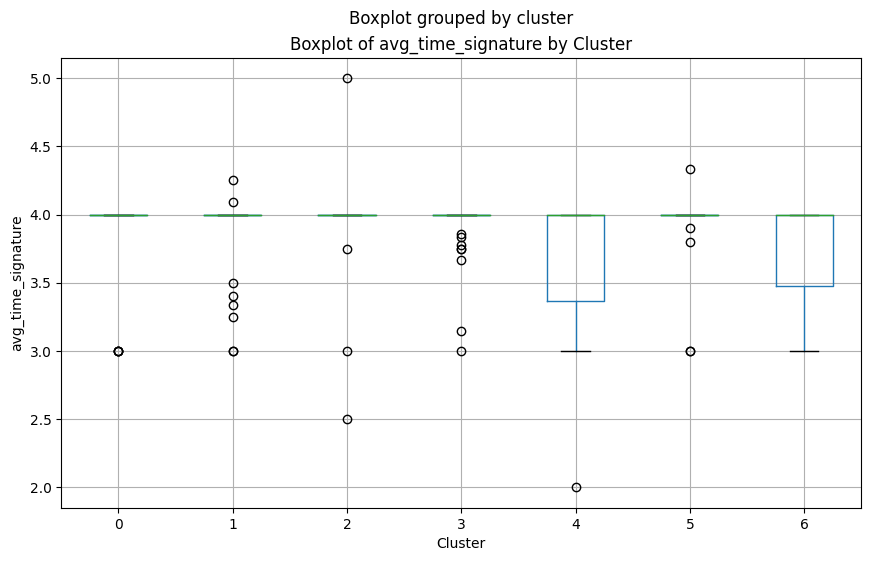

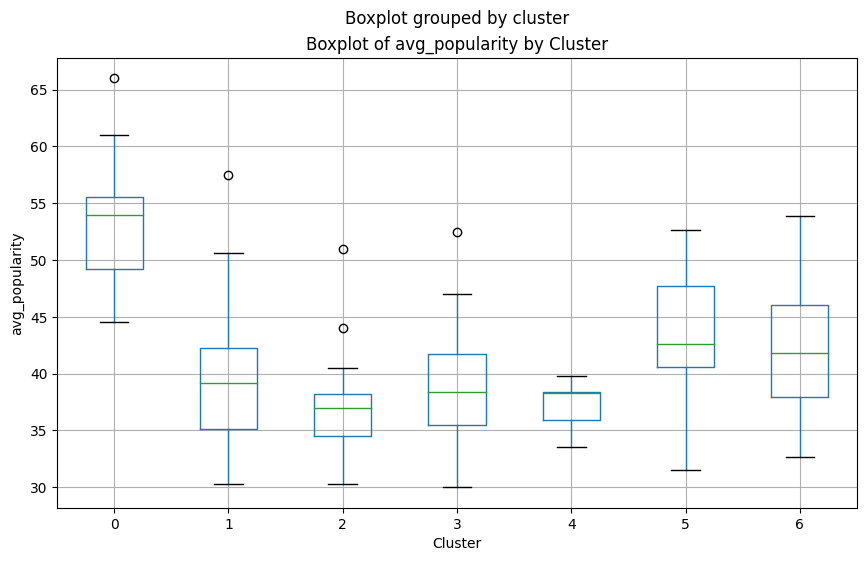

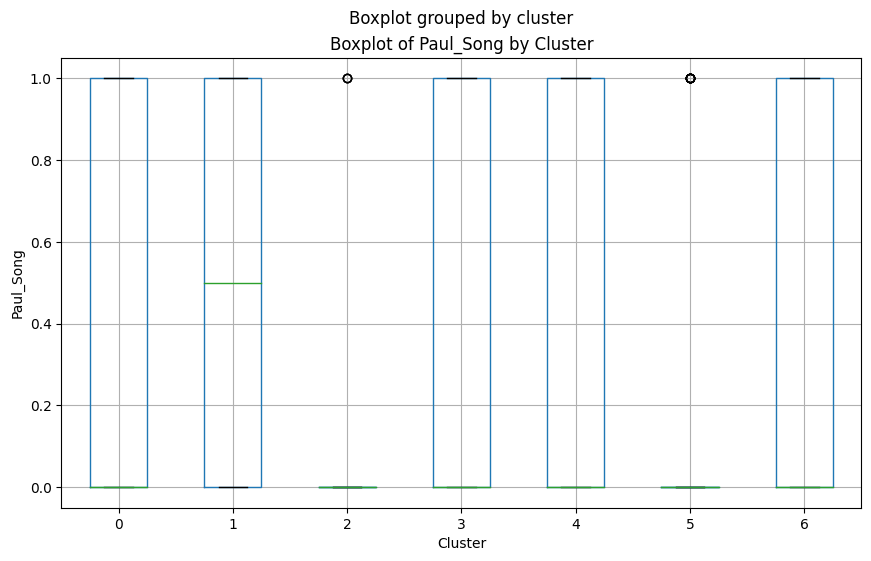

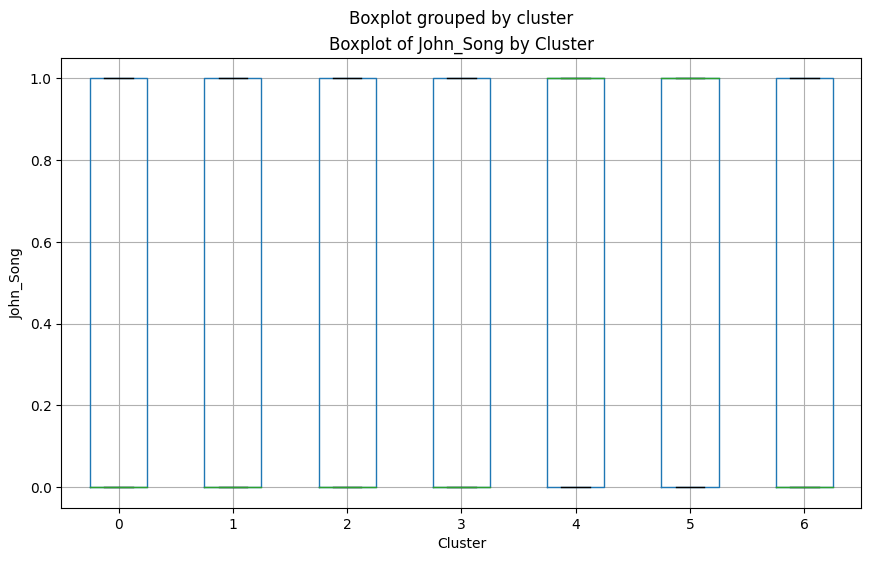

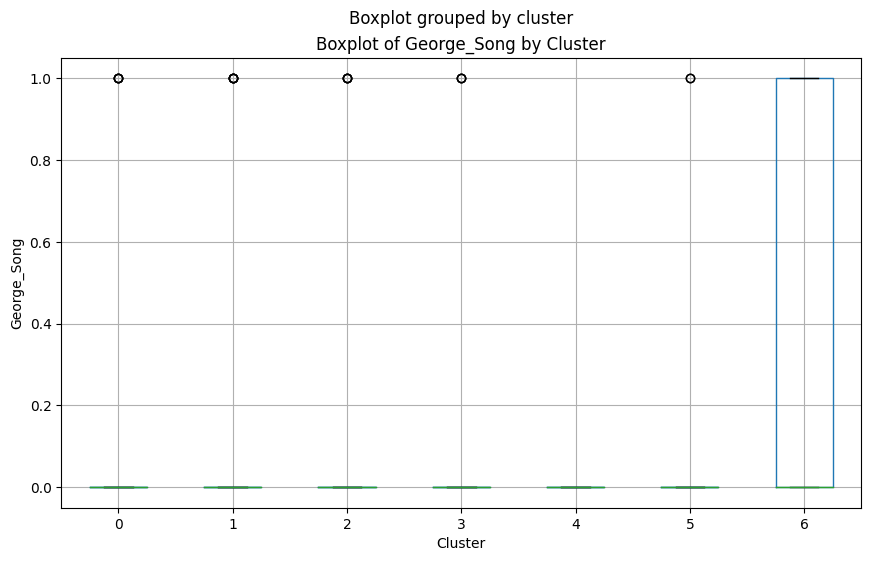

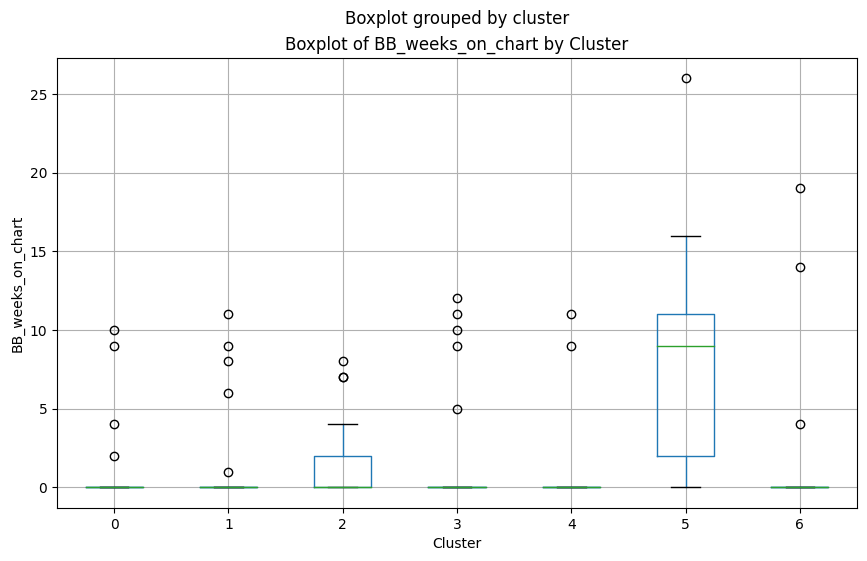

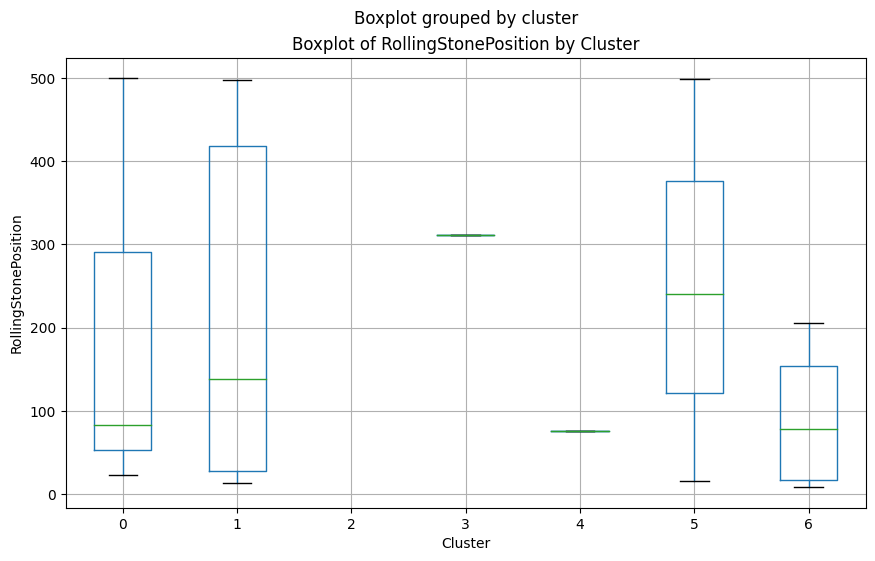

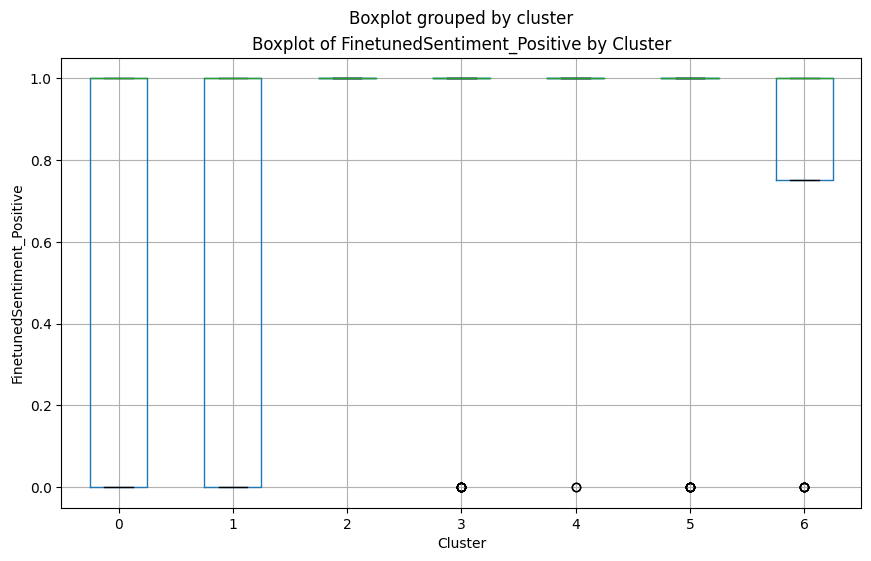

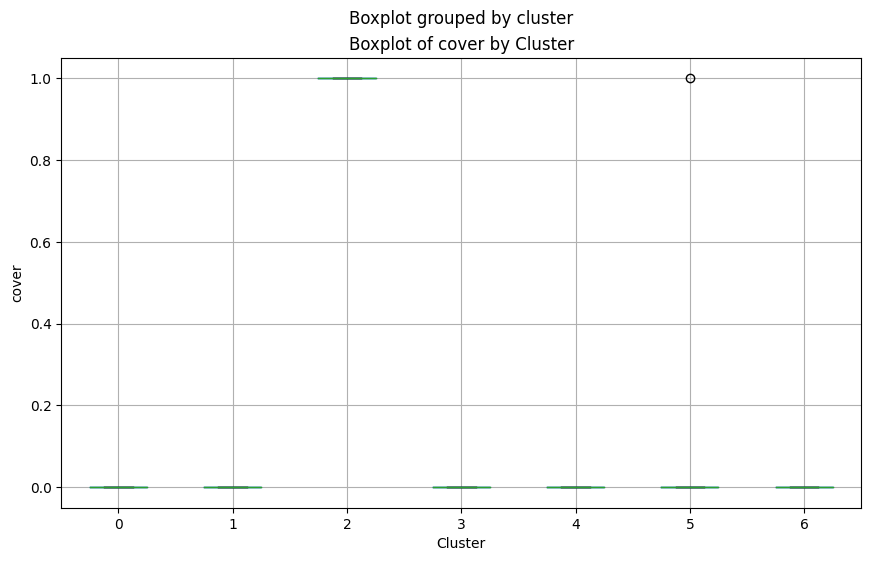

In [103]:
#Do some boxplots for each cluster to see how the clusters differ in terms of the audio features


# Columns to include in the boxplot
columns = ['year', 'avg_danceability', 'avg_energy', 'avg_loudness', 'avg_speechiness', 'avg_acousticness', 'avg_instrumentalness', 'avg_liveness', 
             'avg_valence', 'avg_tempo', 'avg_duration_ms', 'avg_time_signature', 'avg_popularity', 'Paul_Song', 'John_Song', 'George_Song',  
             'BB_weeks_on_chart',	'RollingStonePosition', 'FinetunedSentiment_Positive', 'cover']

# Split the DataFrame by 'cluster' and draw a boxplot for each column
for column in columns:
    df.boxplot(column=column, by='cluster', figsize=(10, 6))
    plt.title(f'Boxplot of {column} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(column)
    plt.show()


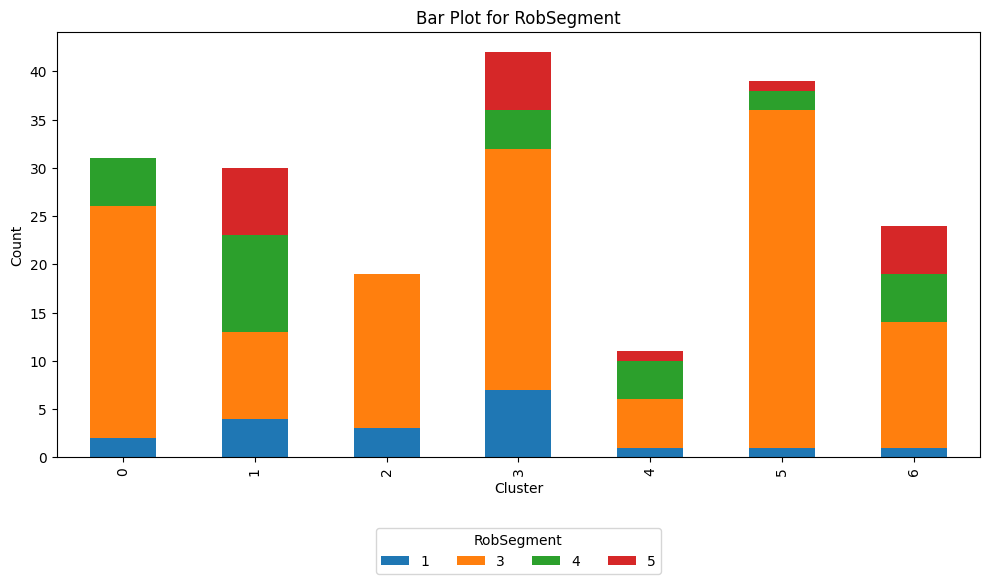

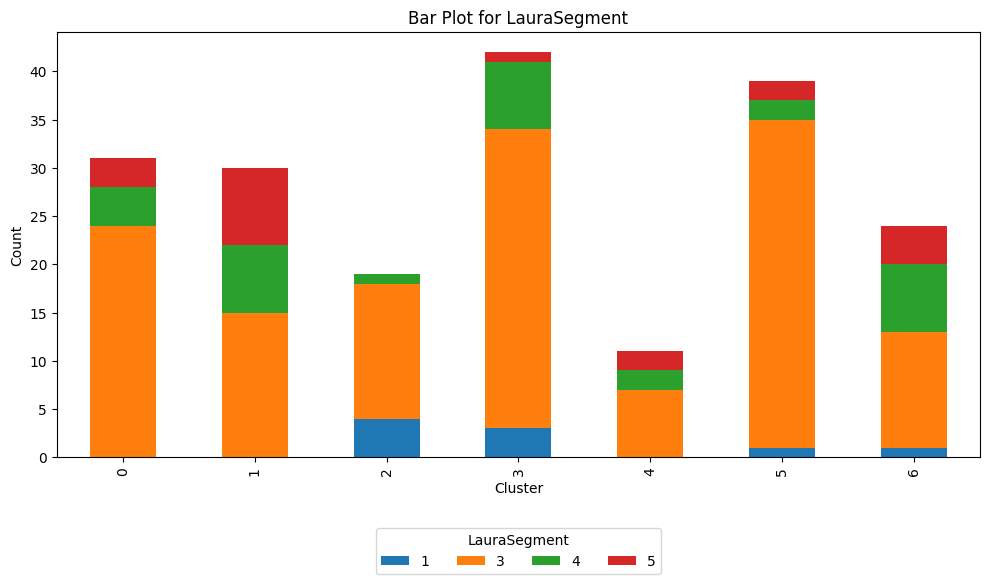

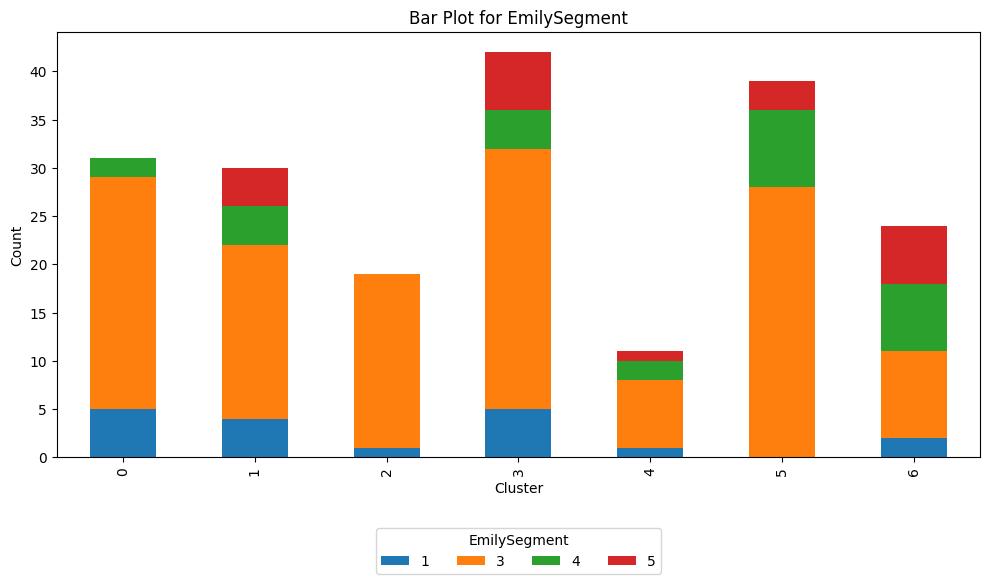

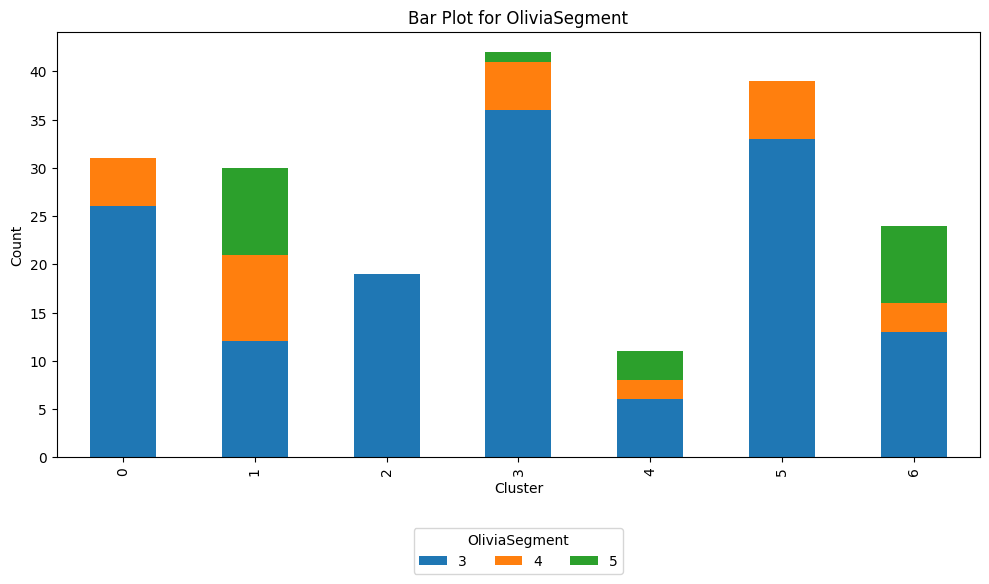

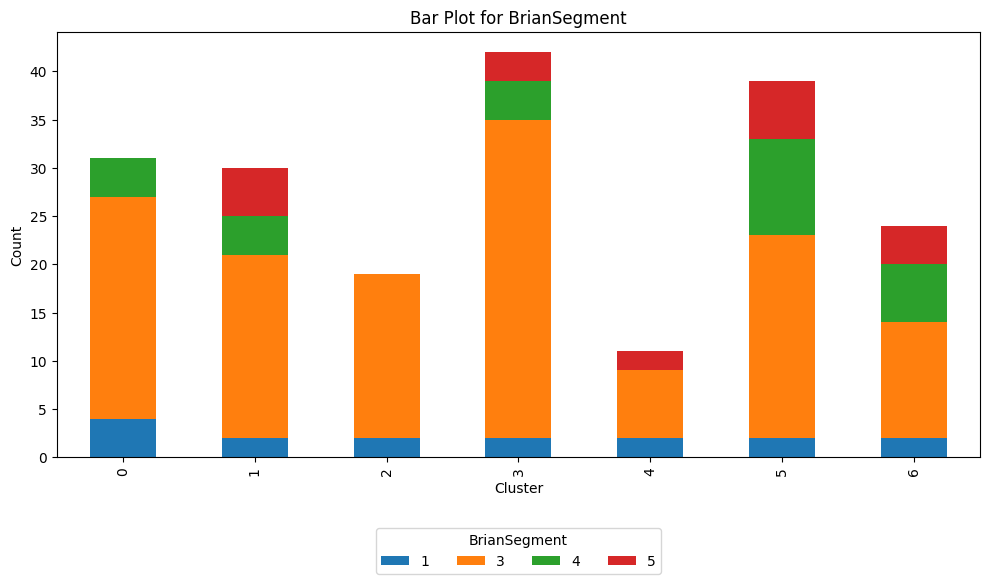

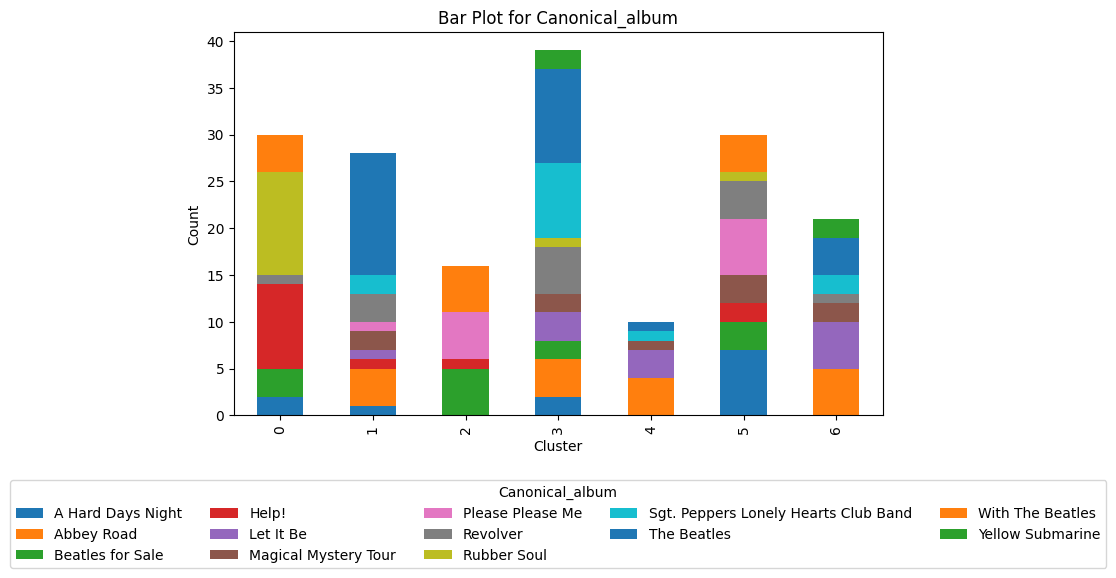

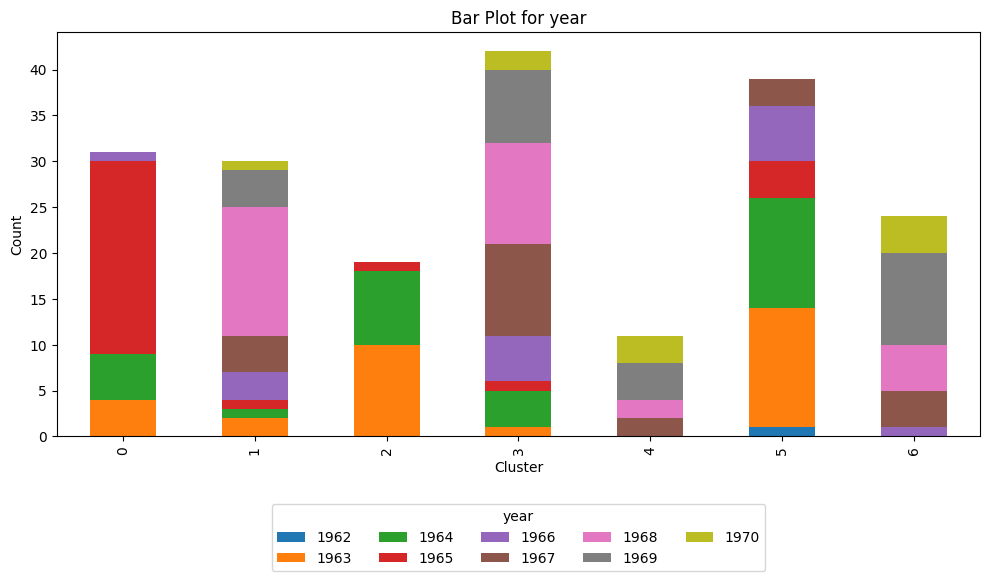

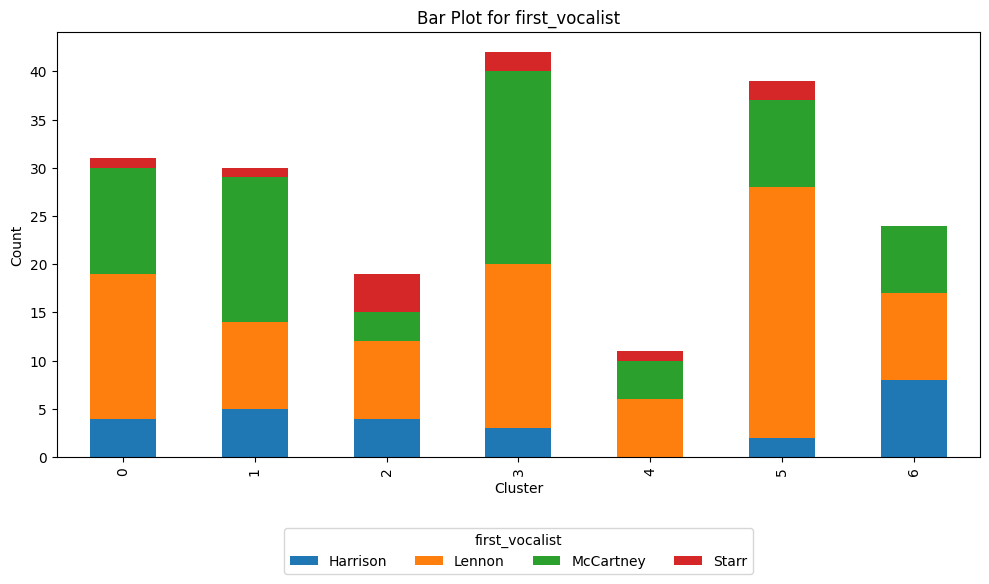

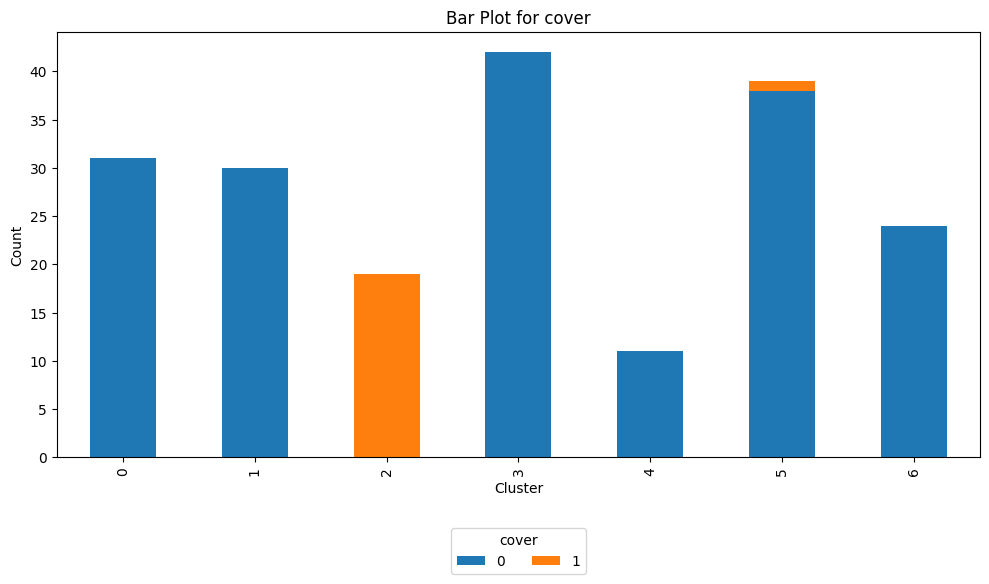

In [104]:
# Categorical variables to split by
variables = ['RobSegment', 'LauraSegment', 'EmilySegment', 'OliviaSegment', 'BrianSegment', 'Canonical_album',   'year', 'first_vocalist', 'cover']

# Iterate over the categorical variables
for variable in variables:
    # Create a subplot for each variable
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title(f'Bar Plot for {variable}')
    
    # Count the occurrences of each segment within the variable
    counts = df.groupby(['cluster', variable]).size().unstack()
    
    # Plot the bar plot
    counts.plot(kind='bar', stacked=True, ax=ax)
    
    # Set labels and legend
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Count')
    ax.legend(title=variable, bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=5)
    
    # Adjust the layout
    plt.tight_layout()
    plt.show()


In [105]:
##Assign the cluster labels to the original dataframe

# Create a mapping dictionary. Replace 'Name1', 'Name2', etc. with your actual cluster names.
cluster_name_mapping = {
    0: 'Fab Four - Classic Love Anthems', 
    #This cluster includes many famous Beatles love songs, such as "All My Loving," "Can't Buy Me Love," and "Love Me Do."
    #"All My Loving", "All You Need Is Love", "Any Time at All", "Baby's in Black", "Can't Buy Me Love", "Do You Want to Know a Secret", 
    # "Eight Days a Week", "From Me to You", "Got to Get You into My Life", "A Hard Day's Night", "Hello, Goodbye", "Help!", 
    # "I Am the Walrus", "I Don't Want to Spoil the Party", "I Feel Fine", "I Saw Her Standing There", "I Wanna Be Your Man", 
    # "I Want to Hold Your Hand", "I'll Cry Instead", "Little Child", "Love Me Do", "Misery", "Not a Second Time", "Nowhere Man", 
    # "Paperback Writer", "Please Please Me", "Rain", "She Loves You", "She Said She Said", "She's a Woman", "Taxman", "Tell Me Why", 
    # "Thank You Girl", "Ticket to Ride", "Twist and Shout", "We Can Work It Out", "When I Get Home", "Yellow Submarine", "You Can't Do That".


    1: 'Contemplative Angsty Love Songs', 
    # This cluster contains songs that seem to deal with love and relationships in a more introspective or nuanced way, such as "In My Life," "Michelle," and "You've Got to Hide Your Love Away."
    #"All I've Got to Do", "Another Girl", "Day Tripper", "Don't Bother Me", "Drive My Car", "Every Little Thing", "For No One", "Girl", 
    # "Hold Me Tight", "I Need You", "I Should Have Known Better", "If I Fell", "If I Needed Someone", "I'll Follow the Sun", 
    # "I've Just Seen a Face", "In My Life", "It Won't Be Long", "It's Only Love", "Michelle", "The Night Before", 
    # "Norwegian Wood (This Bird Has Flown)", "Run for Your Life", "Tell Me What You See", "Wait", "What Goes On", "What You're Doing", 
    # "The Word", "You Like Me Too Much", "You Won't See Me", "You're Going to Lose That Girl", "You've Got to Hide Your Love Away".

    2: 'Melancholic Acoustic Melodies', 
    #This cluster includes more introspective, slower-paced, and emotionally poignant songs like "Because," "Blackbird," "Happiness Is a Warm Gun," and "Yesterday."
    # "And I Love Her", "Ask Me Why", "Because", "Blackbird", "Cry Baby Cry", "A Day in the Life", "Eleanor Rigby", "The Fool on the Hill", 
    # "Golden Slumbers", "Good Night", "Happiness Is a Warm Gun", "Here, There and Everywhere", "Honey Pie", "I Will", "The Inner Light", 
    # "Julia", "The Long and Winding Road", "Long, Long, Long", "Love You To", "Martha My Dear", "Mother Nature's Son", "Piggies", 
    # "Rocky Raccoon", "Sexy Sadie", "She's Leaving Home", "Something", "Sun King", "This Boy", "Yesterday", "Your Mother Should Know".

    3: 'Early Covers',
    # The songs in this cluster are mostly covers of older rock 'n roll and R&B songs, such as "Act Naturally," "Rock and Roll Music," and "Till There Was You."
    # "Act Naturally", "Anna (Go to Him)", "Baby It's You", "Boys", "Chains", "Devil in Her Heart", "Everybody's Trying to Be My Baby", 
    # "Honey Don't", "Long Tall Sally", "Matchbox", "Money (That's What I Want)", "Mr. Moonlight", "Rock and Roll Music", 
    # "Roll Over Beethoven", "Slow Down", "A Taste of Honey", "Till There Was You", "Words of Love", "You Really Got a Hold on Me".

    4: 'Psychedelic Soundscape',
    # Many songs in this cluster are from the Beatles' more experimental and psychedelic, like "Across the Universe," "Come Together," "Lucy in the Sky with Diamonds," and "Tomorrow Never Knows."
    # "Across the Universe", "Blue Jay Way", "Come Together", "Dear Prudence", "Dig a Pony", "Don't Let Me Down", "Helter Skelter", 
    # "Here Comes the Sun", "Hey Jude", "I Me Mine", "I Want You (She's So Heavy)", "I've Got a Feeling", "It's All Too Much", "Let It Be", 
    # "Lucy in the Sky with Diamonds", "Magical Mystery Tour", "Oh! Darling", "Old Brown Shoe", "Only a Northern Song", "Tomorrow Never Knows",
    #  "While My Guitar Gently Weeps", "Within You Without You", "Yer Blues", "You Never Give Me Your Money".

    5: 'Eclectic Rockers',
    #This cluster includes a wide range of upbeat, eclectic songs with various themes, such as "Back in the U.S.S.R.," "Ob-La-Di, Ob-La-Da," "Revolution," and "Sgt. Pepper's Lonely Hearts Club Band."
    #"All Together Now", "And Your Bird Can Sing", "Baby, You're a Rich Man", "Back in the U.S.S.R.", "The Ballad of John and Yoko", 
    # "Being for the Benefit of Mr. Kite!", "Birthday", "Carry That Weight", "The Continuing Story of Bungalow Bill", "Doctor Robert", 
    # "Don't Pass Me By", "Everybody's Got Something to Hide Except Me and My Monkey", "Fixing a Hole", "For You Blue", "Get Back", 
    # "Getting Better", "Glass Onion", "Good Day Sunshine", "Good Morning Good Morning", "Hey Bulldog", "I Want to Tell You", 
    # "I'll Be Back", "I'll Get You", "I'm a Loser", "I'm Looking Through You", "I'm Only Sleeping", "Lovely Rita", "Maxwell's Silver Hammer",
    #  "Mean Mr. Mustard", "No Reply", "Ob-La-Di, Ob-La-Da", "Penny Lane", "Revolution", "Savoy Truffle", 
    # "Sgt. Pepper's Lonely Hearts Club Band (Reprise)", "She Came In Through the Bathroom Window", "Things We Said Today", 
    # "Two of Us", "When I'm Sixty-Four", "Why Don't We Do It in the Road?", "Wild Honey Pie", "With a Little Help from My Friends".

    6: 'Experimental Musings'
    #This cluster contains songs that represent the Beatles' experimental side, like "Dig It," "Her Majesty," "Strawberry Fields Forever," and "Polythene Pam."
    # "Dig It", "The End", "Her Majesty", "I'm So Tired", "Lady Madonna", "Maggie Mae", "Octopus's Garden", "One After 909", "Polythene Pam", 
    # "Sgt. Pepper's Lonely Hearts Club Band", "Strawberry Fields Forever".
    }

# Apply the mapping to the 'Cluster' column to create the 'Cluster_Name' column.
df['Cluster_Name'] = df['cluster'].map(cluster_name_mapping)


In [106]:
##Assign a musical key to each song using the standard notation of keys in Western music

key_name_mapping = {
    0: 'C',
    1: 'C#/Db',
    2: 'D',
    3: 'D#/Eb',
    4: 'E',
    5: 'F',
    6: 'F#/Gb',
    7: 'G',
    8: 'G#/Ab',
    9: 'A',
    10: 'A#/Bb',
    11: 'B'
}

# Apply the mapping to the 'Key' column to create the 'keyname' column.
df['keyname'] = df['max_key'].map(key_name_mapping)







In [ ]:
df.columns

Index(['Id', 'SongKey', 'song', 'songwriters', 'lead_vocals', 'year', 'cover',
       'Era', 'first_release_date', 'max_key', 'mode', 'avg_danceability',
       'avg_energy', 'avg_loudness', 'avg_speechiness', 'avg_acousticness',
       'avg_instrumentalness', 'avg_liveness', 'avg_valence', 'avg_tempo',
       'avg_duration_ms', 'avg_time_signature', 'Song_y', 'lyrics',
       'avg_popularity', 'core_catalogue_releases', 'Canonical_album',
       'first_vocalist', 'Paul_Song', 'John_Song', 'George_Song', 'Ringo_Song',
       'popularity', 'BB_name', 'BB_artist', 'BB_debut_date',
       'BB_peak_position', 'BB_peak_date', 'BB_weeks_on_chart',
       'RollingStonePosition', 'RobSegment', 'LauraSegment', 'EmilySegment',
       'OliviaSegment', 'BrianSegment', 'JackieSegment', 'vader_neg',
       'vader_neu', 'vader_pos', 'vader_compound', 'roberta_neg',
       'roberta_neu', 'roberta_pos', 'Pipeline_sentiment_label',
       'Pipeline_sentiment_score', 'distilbertsentiment', 'text-davinci-

In [110]:
## I did a bunch of cleaning and feature engineering in the dataframe, so I'm going to merge that with the original  dataframe from the previous steps
originaldf = pd.read_pickle('BeatlesSongsNLPwithGPT.pkl')



# First, let's keep only the required columns from df
df = df[['SongKey', 'cluster', 'Cluster_Name', 'keyname']]

# Now, merge df with originaldataframe on 'SongKey'
merged_df = pd.merge(originaldf, df, on='SongKey', how='left')

In [111]:
merged_df.columns

Index(['Id', 'SongKey', 'song', 'songwriters', 'lead_vocals', 'year', 'cover',
       'Era', 'first_release_date', 'max_key', 'mode', 'avg_danceability',
       'avg_energy', 'avg_loudness', 'avg_speechiness', 'avg_acousticness',
       'avg_instrumentalness', 'avg_liveness', 'avg_valence', 'avg_tempo',
       'avg_duration_ms', 'avg_time_signature', 'Song_y', 'lyrics',
       'avg_popularity', 'core_catalogue_releases', 'Canonical_album',
       'first_vocalist', 'Paul_Song', 'John_Song', 'George_Song', 'Ringo_Song',
       'popularity', 'BB_name', 'BB_artist', 'BB_debut_date',
       'BB_peak_position', 'BB_peak_date', 'BB_weeks_on_chart',
       'RollingStonePosition', 'RobSegment', 'LauraSegment', 'EmilySegment',
       'OliviaSegment', 'BrianSegment', 'JackieSegment', 'vader_neg',
       'vader_neu', 'vader_pos', 'vader_compound', 'roberta_neg',
       'roberta_neu', 'roberta_pos', 'Pipeline_sentiment_label',
       'Pipeline_sentiment_score', 'FinetunedSentiment', 'distilbertsent

In [112]:
merged_df.shape

(198, 64)

In [119]:
merged_df.loc[merged_df['song'] == 'Real Love', :] 


,Id,SongKey,song,songwriters,lead_vocals,year,cover,Era,first_release_date,max_key,mode,avg_danceability,avg_energy,avg_loudness,avg_speechiness,avg_acousticness,avg_instrumentalness,avg_liveness,avg_valence,avg_tempo,avg_duration_ms,avg_time_signature,Song_y,lyrics,avg_popularity,core_catalogue_releases,Canonical_album,first_vocalist,Paul_Song,John_Song,George_Song,Ringo_Song,popularity,BB_name,BB_artist,BB_debut_date,BB_peak_position,BB_peak_date,BB_weeks_on_chart,RollingStonePosition,RobSegment,LauraSegment,EmilySegment,OliviaSegment,BrianSegment,JackieSegment,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Pipeline_sentiment_label,Pipeline_sentiment_score,FinetunedSentiment,distilbertsentiment,text-davinci-002,text-davinci-003,summary3dot5turbo,gpt4,cluster,Cluster_Name,keyname
196,213,reallove,Real Love,Lennon,Lennon,1996,0,Group of Solo Artists,1996-03-04,8.0,1.0,0.375,0.694,-7.334,0.031,0.0458,0.019,0.257,0.405,175.726,234053.0,4.0,Real love,"All my little plans and schemes Lost like some forgotten dream Seems like all I really was doing Was waiting for you Just like little girls and boys Playing with their little toys Seems like all they really were doing Was waiting for you Don't need to be alone No need to be alone It's real love It's real, yes it's real love It's real From this moment on I know Exactly where my life will go Seems that all I really was doing Was waiting for love Don't need to be afraid No need to be afraid It's real love It's real, yes it's real love It's real Thought I'd been in love before, But in my heart I wanted more Seems like all I really was doing Was waiting for you Don't need to be alone No need to be alone It's real love Yes it's real, yes it's real love It's real, yes it's real love...",53.0,Anthology 2,Anthology 2,Lennon,0,1,0,0,53,Real Love,The Beatles,1996-03-23,11,1996-03-23,7,NaN,4,3,3,3,3,NaN,0.087,0.635,0.278,0.9896,0.021647,0.26809,0.710262,POSITIVE,0.996832,Positive,0,"The text is about how love is real and how it can change your life. It talks about how people often wait for love, and how it can be worth the wait.","The narrator realizes that all their plans and dreams were just a way of waiting for someone to love them. They no longer need to be alone or afraid, as they have found real love. They had thought they had been in love before, but now they know what true love is.","0.80, The lyrics express a sense of longing and waiting for love. The singer recounts how all their plans and dreams seemed lost until they found love. They reflect on how even others, like children playing, were also waiting for love. The lyrics reassure that there's no need to be alone or afraid because real love has been found. The singer realizes that their previous experiences were incomplete, as they were truly waiting for the person they love.",TBD,NaN,NaN,NaN


In [120]:
merged_df.to_pickle('BeatlesSongsClustered.pkl') # dump processed file
merged_df.to_csv('BeatlesSongsClustered.csv', index=False) # dump processed file